<a href="https://colab.research.google.com/github/canast07/EPL448-Ticket-price/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Approach 1

In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Loading data in variable trainData

In [449]:
trainData = pd.read_excel("Data_Train.xlsx")

Removing problematic rows (rows that contain null fields) 

In [450]:
print(trainData.count())
print("Records with nulls: ",trainData.isnull().sum().sum())
trainData = trainData.dropna()
print("Records with nulls after cleanup: ",trainData.isnull().sum().sum())
print(trainData.count())

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64
Records with nulls:  2
Records with nulls after cleanup:  0
Airline            10682
Date_of_Journey    10682
Source             10682
Destination        10682
Route              10682
Dep_Time           10682
Arrival_Time       10682
Duration           10682
Total_Stops        10682
Additional_Info    10682
Price              10682
dtype: int64


Removing columns we consider not worth exploring

In [451]:
trainData.pop("Route") # Route is duplicate information because of source-destination
trainData.pop("Source") 
trainData.pop("Destination") # Source - Destination can be replaced with Duration time 
trainData.pop("Arrival_Time")
trainData.pop("Dep_Time") # For this approach we will ignore arrival_time and dep_time
trainData.pop("Date_of_Journey")

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

```
1	No info
2	1 Long layover
3	2 Long layover
4	1 Short layover
5	Business class
6	Change airports
7	In-flight meal not included
8	Red-eye flight
9	No check-in baggage included
```
For column Additional_Info we have those 9 categories. We are going to replace the additional with 9 new columns (1 each category)*italicised text*

In [452]:
trainData = pd.get_dummies(trainData, columns= ['Additional_Info'],drop_first=True)
trainData = pd.get_dummies(trainData, columns= ['Airline'],drop_first=True)
trainData.head()

,Duration,Total_Stops,Price,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,2h 50m,non-stop,3897,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,7h 25m,2 stops,7662,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,19h,2 stops,13882,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,5h 25m,1 stop,6218,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,4h 45m,1 stop,13302,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


Translating total-stops to 0..4

In [453]:
trainData['Total_Stops'] = trainData['Total_Stops'].replace(['non-stop'],'0')
trainData['Total_Stops'] = trainData['Total_Stops'].str.split(" ", n=1, expand = True)
trainData.head()

,Duration,Total_Stops,Price,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,2h 50m,0,3897,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,7h 25m,2,7662,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,19h,2,13882,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,5h 25m,1,6218,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,4h 45m,1,13302,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


test both methods:
1 - translate total stops to 0-4 and normalize the values
2 - split the stops to new columns 

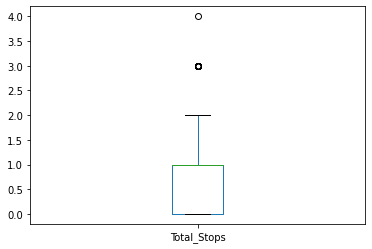

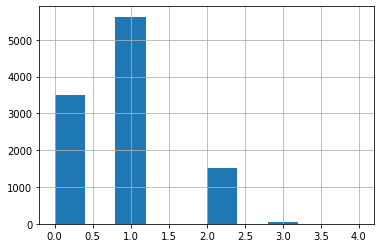

,Duration,Total_Stops,Price,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,2h 50m,0.00,3897,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,7h 25m,0.50,7662,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,19h,0.50,13882,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,5h 25m,0.25,6218,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,4h 45m,0.25,13302,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,0.00,4107,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10679,2h 35m,0.00,4145,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
10680,3h,0.00,7229,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
10681,2h 40m,0.00,12648,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [454]:
trainData['Total_Stops']=trainData['Total_Stops'].astype(int)
trainData['Total_Stops'].plot(kind='box', subplots=True)
plt.show()
trainData['Total_Stops'].hist()
plt.show()
#trainData['Total_Stops'] = (trainData.Total_Stops - trainData.Total_Stops.mean())/(trainData.Total_Stops.std()) # normalize rating
trainData['Total_Stops'] = (trainData.Total_Stops - trainData.Total_Stops.min())/(trainData.Total_Stops.max() - trainData.Total_Stops.min()) # normalize rating
trainData


convert time to xh ym to -> x*60+y

In [455]:
# trainData['Duration'] = trainData['Duration'].str.replace('m','')
# trainData
arr = np.empty((trainData['Duration'].count()))
trainData = trainData.reset_index(drop = True)
print(len(arr))
i = 0
for x in trainData['Duration']:
  # print("x", x)
  hours = 0
  minutes = 0
  if 'h' in str(x):
    tokens = str(x).split("h")
    hours = int(tokens[0]) * 60
    # print("hours = ", hours)
    if 'm' in str(x):
      temp = tokens[1].replace(' ', '').replace('m','')
      minutes = int(temp)
  else:
    temp = tokens[1].replace(' ', '').replace('m','')
    minutes = int(temp)
  time = hours + minutes
  arr[i] = time
  i += 1
  trainData['Duration'] = pd.Series(arr.astype(int))
trainData



10682


,Duration,Total_Stops,Price,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,170,0.00,3897,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,445,0.50,7662,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,1140,0.50,13882,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,325,0.25,6218,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,285,0.25,13302,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,150,0.00,4107,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10678,155,0.00,4145,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
10679,180,0.00,7229,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
10680,160,0.00,12648,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


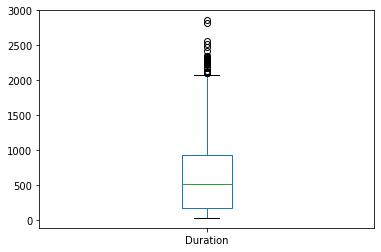

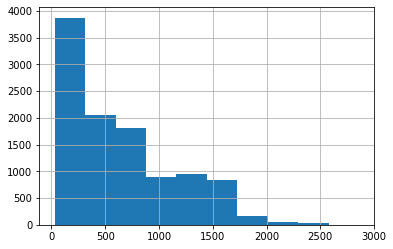

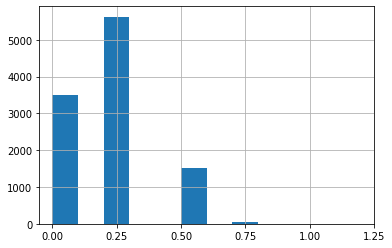

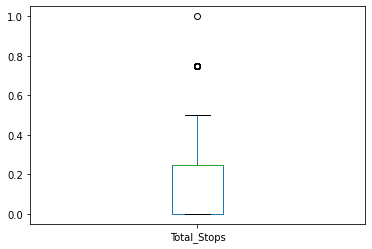

In [456]:
trainData['Duration'].plot(kind='box', subplots=True)
plt.show()
trainData['Duration'].hist()
plt.show()
trainData['Total_Stops'].hist()
plt.xticks([0.0,0.25,0.5,0.75,1.0, 1.25])
plt.show()
trainData['Total_Stops'].plot(kind='box', subplots=True)
plt.show()

Now we will remove the outlier values

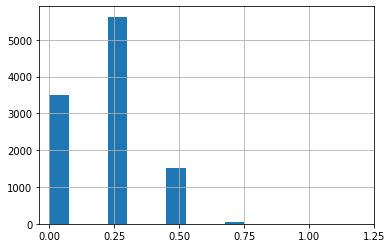

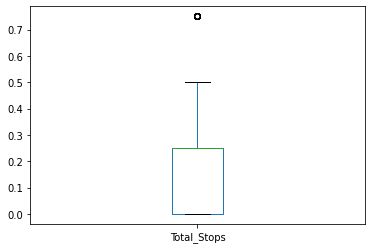

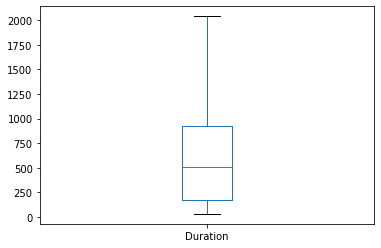

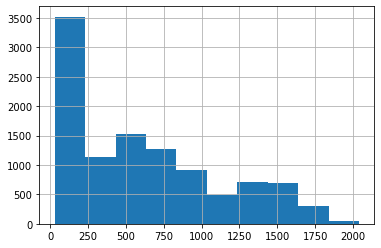

In [459]:
# Remove outliers of Total_Stops
median = np.percentile(trainData.Total_Stops,50)  # median
std = trainData.Total_Stops.std() # standard deviation 
trainData = trainData.drop(trainData[ trainData.Total_Stops > (median+3*std)].index) # drop "outliers " that are > median + 3*std
trainData['Total_Stops'].hist()
plt.xticks([0.0,0.25,0.5,0.75,1.0, 1.25])
plt.show()
trainData['Total_Stops'].plot(kind='box', subplots=True)
plt.show()

# Remove outliers of Duration
median = np.percentile(trainData.Duration,50)  # median
std = trainData.Duration.std() # standard deviation 
trainData = trainData.drop(trainData[ trainData.Duration > (median+3*std)].index) # drop "outliers " that are > median + 3*std
trainData['Duration'].plot(kind='box', subplots=True)
plt.show()
trainData['Duration'].hist()
plt.show()